<a href="https://colab.research.google.com/github/JorgeSC98/SpeechEmotion-Recognition/blob/main/SpeechEmotionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Emotion Recognition

###  Authors
Jorge Sáenz, Omar Muñoz, Elias Villalvazo, Israel Cárdenas, Luis Deutsch.

### Summary

Speech Emotion Recognition (SER) is the act of attempting to recognize human
emotion and affective states from speech, since voice often reflects different un-
derlying emotions by the tone and pitch. This area of research encompasses an
important problem that is receiving increasing interest due to its applications
in areas such as audio surveillance, clinical studies, mental state recognition,
conversational analysis, among others

# Methodology

## Feature extraction

The raw audio files are processed, features are extracted and a database is created. Such steps are implemented in the related notebook below.

Data extraction file

# Classification models

In [ ]:
from google.colab            import files
from google.colab            import drive

from sklearn.model_selection import train_test_split
from sklearn.neural_network  import MLPClassifier
from sklearn.preprocessing   import LabelEncoder
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import confusion_matrix, roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay, mean_squared_error, classification_report
from tqdm                    import tqdm
from sklearn.svm             import SVC
from sklearn                 import metrics
from sklearn.datasets        import load_digits
from matplotlib              import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn                 import preprocessing

from tensorflow.keras        import layers as L
from tensorflow.keras        import layers
from tensorflow.keras        import Model

import matplotlib.pyplot     as plt
import tensorflow            as tf
import pandas                as pd
import seaborn               as sns
import numpy                 as np
import os, glob, pickle
import librosa
import soundfile

import warnings
warnings.filterwarnings("ignore")

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Load data from file

In [ ]:
db_path     = '/content/gdrive/Myunit/Machine_Learning/SpeechRecognition/data/'
filename    = 'database_4emotions.pkl'

with open(db_path + filename, "rb") as fh:
  df = pickle.load(fh)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,labels
0,0.119855,0.507461,0.414120,0.401716,0.409684,0.421298,0.516690,0.537631,0.590918,0.640058,...,1.338648e-13,1.309344e-13,20.370474,18.402018,18.706955,17.229192,18.818294,18.757125,60.299300,fearful
1,0.272872,0.598629,0.556412,0.565423,0.577642,0.594398,0.611372,0.538784,0.579985,0.654674,...,9.955534e-05,1.028548e-04,14.896172,17.230610,17.458664,15.637138,15.465091,14.857155,14.319924,fearful
2,0.113133,0.606384,0.411250,0.374669,0.412562,0.385073,0.455472,0.502469,0.521309,0.601805,...,1.592488e-11,1.517740e-11,20.748005,18.602199,20.547905,18.824408,21.102303,20.811776,44.048627,fearful
3,0.121266,0.480263,0.422342,0.468604,0.466126,0.490174,0.548692,0.555605,0.593634,0.596291,...,5.084489e-12,5.084499e-12,21.361512,19.764985,20.110708,17.858791,19.005673,19.560215,60.839976,calm
4,0.253915,0.587318,0.601298,0.596231,0.615663,0.647406,0.576359,0.603092,0.619207,0.645742,...,3.304043e-04,3.335241e-04,14.709076,18.327844,18.166773,15.902382,15.985995,14.690535,13.897322,calm


In [ ]:
X = df.iloc[: ,:-1].values
Y = df['labels'].values

Scale the feature vector

In [ ]:
scaler = StandardScaler()
X      = scaler.fit_transform(X)

Divide in train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

Visualize the class distribution

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{'calm': 428, 'disgust': 434, 'fearful': 437, 'happy': 429}

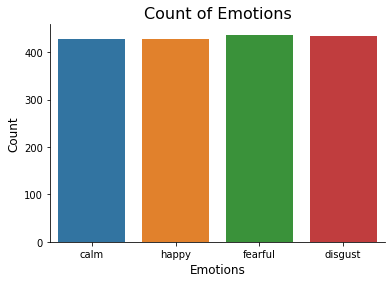

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(y_train)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

Change categorical variables to numerical

In [ ]:
label_encoder = LabelEncoder()

integer_encoded      = label_encoder.fit_transform(y_train)
integer_encoded_test = label_encoder.fit_transform(y_test)

In [ ]:
y_train_encoded = integer_encoded
y_test_encoded = integer_encoded_test

## Baseline model

The model below is extracted from: https://data-flair.training/blogs/python-mini-project-speech-emotion-recognition/

This model is used as a baseline for comparing our own models.

In [ ]:
# Model creation
mlp_model = MLPClassifier(activation='relu', alpha=0.01,batch_size=256,beta_1=0.9,beta_2=0.999,early_stopping=False,epsilon=1e-08,hidden_layer_sizes=(300,), learning_rate='adaptive', learning_rate_init=0.001,
                      max_iter=500, momentum=0.9,n_iter_no_change=10,nesterovs_momentum=True,power_t=0.5,random_state=None,shuffle=True,solver='adam',tol=0.0001,validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
# Training
mlp_model.fit(x_train, y_train_encoded)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
# Test
y_pred=mlp_model.predict(x_test)

Performance evaluation

In [ ]:
# Performance metrics: Accuracy
accuracy=accuracy_score(y_true=y_test_encoded, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 88.54%


Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.89
----------------------------------
              precision    recall  f1-score   support

        calm       0.92      0.94      0.93       148
     disgust       0.91      0.88      0.90       142
     fearful       0.87      0.88      0.87       139
       happy       0.84      0.84      0.84       147

    accuracy                           0.89       576
   macro avg       0.89      0.89      0.89       576
weighted avg       0.89      0.89      0.89       576

----------------------------------


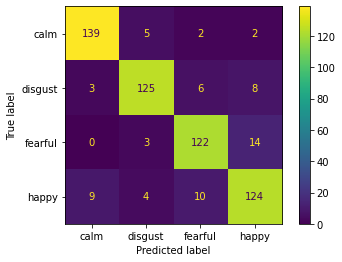

In [ ]:
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(mlp_model.score(x_train, y_train_encoded)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(mlp_model.score(x_test, y_test_encoded)))
print("----------------------------------")
print(classification_report(y_test_encoded, y_pred, target_names=['calm', 'disgust', 'fearful', 'happy']))
print("----------------------------------")
cm   = confusion_matrix(y_test_encoded, y_pred, labels=[0, 1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['calm', 'disgust', 'fearful', 'happy'])
disp.plot()

## Model 1

The first model consists of a Convolutional Neural Network that receives as input a 1-D vector with 189 elements (that is the dimension obtained from feature extraction). The model consists of 4 convolutional layers, which extract 128 filters each. The activation function used between layer is ReLU, and dropout of 0.2 is added at the end of each block.

In [ ]:
def speech_model_build():
  input_layer = L.Input(shape=(189, 1))

  cnn1 = L.Conv1D(256, (5))(input_layer)
  batch_norm1 = L.BatchNormalization()(cnn1)
  relu1 = L.ReLU()(batch_norm1)

  cnn2 = L.Conv1D(128, (5))(relu1)
  relu2 = L.ReLU()(cnn2)
  dropout1 = L.Dropout(0.1)(relu2)
  batch_norm2 = L.BatchNormalization()(dropout1)

  max_pool1 = L.MaxPool1D(8)(batch_norm2)

  conv3 = L.Conv1D(128, (5))(max_pool1)
  relu3 = L.ReLU()(conv3)
  conv4 = L.Conv1D(128, (5))(relu3)
  relu4 = L.ReLU()(conv4)
  conv5 = L.Conv1D(128, (5))(relu4)
  batch_norm4 = L.BatchNormalization()(conv5)
  relu5 = L.ReLU()(batch_norm4)
  dropout2 = L.Dropout(0.2)(relu5)

  conv6 = L.Conv1D(128, (5))(dropout2)
  flatten = L.Flatten()(conv6)
  dropout3 = L.Dropout(0.2)(flatten)

  out_classes = 4
  output_logits = L.Dense(out_classes)(dropout3)
  batch_norm5 = L.BatchNormalization()(output_logits)
  softmax = L.Softmax()(batch_norm5)
  model = Model(inputs=[input_layer], outputs=[softmax])
  optimizer = tf.keras.optimizers.Adam(1e-5)
  loss = tf.keras.losses.SparseCategoricalCrossentropy()
  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [ ]:
class SpeechModel:
    def __init__(self, num_output_classes=4) -> None:
        self.num_output_classes = num_output_classes

    def getRAVDESS(self) -> Model:
        """Returns a tensorflow model that is according to specifications of the baseline CNN model in the paper."""
        input_layer = L.Input(shape=(189, 1))

        cnn1 = L.Conv1D(256, (5))(input_layer)
        batch_norm1 = L.BatchNormalization()(cnn1)
        relu1 = L.ReLU()(batch_norm1)

        cnn2 = L.Conv1D(128, (5))(relu1)
        relu2 = L.ReLU()(cnn2)
        dropout1 = L.Dropout(0.1)(relu2)
        batch_norm2 = L.BatchNormalization()(dropout1)

        max_pool1 = L.MaxPool1D(8)(batch_norm2)

        conv3 = L.Conv1D(128, (5))(max_pool1)
        relu3 = L.ReLU()(conv3)
        conv4 = L.Conv1D(128, (5))(relu3)
        relu4 = L.ReLU()(conv4)
        conv5 = L.Conv1D(128, (5))(relu4)
        batch_norm4 = L.BatchNormalization()(conv5)
        relu5 = L.ReLU()(batch_norm4)
        dropout2 = L.Dropout(0.2)(relu5)

        conv6 = L.Conv1D(128, (5))(dropout2)
        flatten = L.Flatten()(conv6)
        dropout3 = L.Dropout(0.2)(flatten)

        output_logits = L.Dense(self.num_output_classes)(dropout3)
        batch_norm5 = L.BatchNormalization()(output_logits)
        softmax = L.Softmax()(batch_norm5)
        model = Model(inputs=[input_layer], outputs=[softmax])
        optimizer = tf.keras.optimizers.Adam(1e-5)
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

        return model

Since we filtered our dataset to only four different features (or emotions), we create the model with 4 output layers. The original batch size used is 64, and we train from an interval between 50 and 80 epochs.

In [ ]:
speech_model = SpeechModel(4)
speech_model = speech_model.getRAVDESS()
history = speech_model.fit(x_train, np.asarray(y_train_encoded), batch_size=64, epochs=80)

Epoch 1/80
27/27 [==============================] - 14s 13ms/step - loss: 1.4880 - accuracy: 0.2894
Epoch 2/80
27/27 [==============================] - 0s 12ms/step - loss: 1.4017 - accuracy: 0.3426
Epoch 3/80
27/27 [==============================] - 0s 12ms/step - loss: 1.3260 - accuracy: 0.3663
Epoch 4/80
27/27 [==============================] - 0s 12ms/step - loss: 1.2985 - accuracy: 0.3872
Epoch 5/80
27/27 [==============================] - 0s 12ms/step - loss: 1.2450 - accuracy: 0.4225
Epoch 6/80
27/27 [==============================] - 0s 12ms/step - loss: 1.2354 - accuracy: 0.4329
Epoch 7/80
27/27 [==============================] - 0s 12ms/step - loss: 1.2142 - accuracy: 0.4300
Epoch 8/80
27/27 [==============================] - 0s 12ms/step - loss: 1.2081 - accuracy: 0.4485
Epoch 9/80
27/27 [==============================] - 0s 12ms/step - loss: 1.1899 - accuracy: 0.4456
Epoch 10/80
27/27 [==============================] - 0s 12ms/step - loss: 1.1765 - accuracy: 0.4722
Epoch 11

Test the model

In [ ]:
# Test
y_pred=speech_model.predict(x_test)
y_pred = tf.math.argmax(y_pred, axis=1)

Performance evaluation

In [ ]:
score = speech_model.evaluate(x_train, np.asarray(y_train_encoded))
accuracy_train = score[1]

score = speech_model.evaluate(x_test, np.asarray(y_test_encoded))
accuracy_test = score[1]

print(f"Accuracy in train data: {accuracy_train}")
print(f"Accuracy in test data: {accuracy_test}")

18/18 [==============================] - 0s 3ms/step - loss: 0.9137 - accuracy: 0.6441
Accuracy in train data: 0.7731481194496155
Accuracy in test data: 0.6440972089767456


Accuracy of speech model classifier on training set: 0.77
Accuracy of speech model classifier on test set: 0.64
----------------------------------
              precision    recall  f1-score   support

        calm       0.92      0.53      0.68       148
     disgust       0.48      0.85      0.62       142
     fearful       0.84      0.55      0.66       139
       happy       0.64      0.65      0.64       147

    accuracy                           0.64       576
   macro avg       0.72      0.64      0.65       576
weighted avg       0.72      0.64      0.65       576

----------------------------------


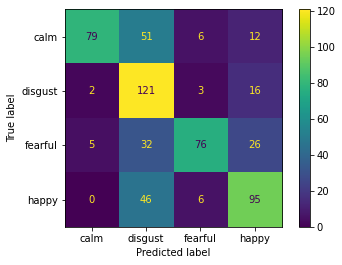

In [ ]:
print('Accuracy of speech model classifier on training set: {:.2f}'
     .format(accuracy_train))
print('Accuracy of speech model classifier on test set: {:.2f}'
     .format(accuracy_test))
print("----------------------------------")
print(classification_report(y_test_encoded, y_pred, target_names=['calm', 'disgust', 'fearful', 'happy']))
print("----------------------------------")
cm   = confusion_matrix(y_test_encoded, y_pred, labels=[0, 1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['calm', 'disgust', 'fearful', 'happy'])
disp.plot()

## Model 2

SVC MODEL

In [ ]:
modelsvc=SVC(kernel='rbf', C=660, gamma=0.001) 

In [ ]:
# Training
modelsvc.fit(x_train,y_train) 

SVC(C=660, gamma=0.001)

In [ ]:
# Test
y_pred=modelsvc.predict(x_test)

In [ ]:
# Performance metrics: Accuracy
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 83.16%


----------------------------------
              precision    recall  f1-score   support

        calm       0.88      0.97      0.93       148
     disgust       0.81      0.83      0.82       142
     fearful       0.83      0.74      0.78       139
       happy       0.79      0.78      0.78       147

    accuracy                           0.83       576
   macro avg       0.83      0.83      0.83       576
weighted avg       0.83      0.83      0.83       576

----------------------------------


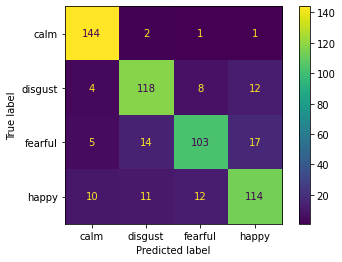

In [ ]:
print("----------------------------------")
print(classification_report(y_test, y_pred, target_names=['calm', 'disgust', 'fearful', 'happy']))
print("----------------------------------")
cm   = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['calm', 'disgust', 'fearful', 'happy'])
disp.plot()

## Model 3

In [ ]:
# Data Agumentation
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [ ]:
def padding( data, length ):
    tf_array = tf.convert_to_tensor( data )
    tf_zeros = np.zeros( length )
    return np.array( tf.concat( [ tf_array, tf_zeros ], 0 ) )

###Data Preprocessing

In [ ]:
path     = '/content/gdrive/Shareddrives/CS4013/HW6/speech-emotion-recognition-ravdess-data/'
Ravdess = path

ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
path_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
path_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

In [ ]:
# Emotions types and number of samples in each class
unique, counts = np.unique( path_df.Emotions, return_counts = True )
dict( zip( unique, counts ) )

{'angry': 192,
 'calm': 192,
 'disgust': 192,
 'fear': 192,
 'happy': 192,
 'neutral': 96,
 'sad': 192,
 'surprise': 192}

In [ ]:
#Load audio files
dataset = []
for emotion, path in tqdm( zip( path_df.Emotions, path_df.Path ), total = len( path_df.Emotions ) ):
    data, sr = librosa.load( path )
    dataset.append( [ emotion, data, sr] )
dataset = np.array( dataset )

100%|██████████| 1440/1440 [20:27<00:00,  1.17it/s]


In [ ]:
emotions, audio_data, sampling_rate = dataset[ :,0 ], dataset[ :,1 ], np.unique( dataset[ :,2 ] )
sampling_rate = sampling_rate[0]

In [ ]:
#Create DataFrame to filter audio by emotions in next steps
df_data = pd.DataFrame( [ [ emotion, data ] for emotion, data in zip( emotions, audio_data ) ], columns = [ 'Emotions', 'Audio_Data' ] )

In [ ]:
#Use the functions to agument the audio data. 
def augmented_data( df ):
    data = []
    for dat in tqdm( df.Audio_Data, total = len( df.Emotions.values ) ):
        data.append( noise( dat )  )
        data.append( stretch( dat) )
        data.append( shift( dat)   )
        data.append( pitch( dat, sampling_rate = sampling_rate) )
    data = np.array( data )
    data = np.array( [ [ df.Emotions.values[0], dat ] for dat in data ] )
    return data 

In [ ]:
#Seperate audio data into 4 different subsets. 
df_calm    = df_data.loc[ ( df_data.Emotions == 'calm')    ]
df_disgust = df_data.loc[ ( df_data.Emotions == 'disgust') ]
df_fear    = df_data.loc[ ( df_data.Emotions == 'fear')    ]
df_happy   = df_data.loc[ ( df_data.Emotions == 'happy')   ]
print( 'Shape of datasets: {}'.format( df_calm.shape ) )

Shape of datasets: (192, 2)


In [ ]:
#Agument the Audio Data
calm    = augmented_data( df_calm )
disgust = augmented_data( df_disgust )
fear    = augmented_data( df_fear )
happy   = augmented_data( df_happy )

100%|██████████| 192/192 [00:30<00:00,  6.27it/s]


In [ ]:
#Combine all audio data into a single DataSet
augmented_data = calm
augmented_data = np.append( augmented_data, disgust, axis = 0 )
augmented_data = np.append( augmented_data, fear   , axis = 0 )
augmented_data = np.append( augmented_data, happy  , axis = 0 )
augmented_data.shape

(3072, 2)

In [ ]:
emotions, audio_data = augmented_data[:,0], augmented_data[:,1]

#Obtain the maximum audio length
shapes_audio = np.unique( np.array( [ data.shape for data in audio_data ] ) )
max_shape = np.max( shapes_audio )
print( "Max shape of audio: {}".format( max_shape ) )

Max shape of audio: 145309


In [ ]:
#Reshape all audios with the same length
audio_data = np.array( [ padding( data, max_shape - len( data ) ) for data in audio_data  ] )

In [ ]:
#Convert 1D audio data into a 2D image data. By applying Fourier Transform it is obtained the spectrogram of each audio. 
spectrum_data = np.array( [ librosa.feature.melspectrogram( data, sr = sampling_rate ) for data in audio_data ]  )

In [ ]:
#Normalize Spectogram for Neural Network
normalize_spectrum_data = np.array( [  preprocessing.normalize( data ) for data in spectrum_data ] )
normalize_spectrum_data = np.reshape( normalize_spectrum_data, ( len(normalize_spectrum_data), 128, 284, 1 ) )
normalize_spectrum_data.shape

(3072, 128, 284, 1)

In [ ]:
#Encode labels and count the number of classes in the DataSet
label_encoder = LabelEncoder()
encoded_emotions = label_encoder.fit_transform( emotions )
dictionary_emotions = { data : encoded_data for data, encoded_data in zip( emotions, encoded_emotions ) }
no_classes = len( dictionary_emotions )
print( 'Number of classes: {}'.format( no_classes ) )
print( dictionary_emotions )

Number of classes: 4
{'calm': 0, 'disgust': 1, 'fear': 2, 'happy': 3}


In [ ]:
#Split DataSet into train and test.
x_train, x_test, y_train, y_test = train_test_split( normalize_spectrum_data, encoded_emotions, random_state=0, shuffle=True)
print( 'Number of train samples {}. \nNumber of test samples: {}'.format( len( x_train), len( x_test) ) )

Number of train samples 2304. 
Number of test samples: 768


###Neural Network Model

In [ ]:
#Create Convolutional Neural Network
def speech_classifier_model_3( no_classes=4 ):

    input_layer = layers.Input( shape = ( 128, 284, 1 ) )

    cnn_1        = layers.Conv2D( 64, (3,3), strides = (2,2), padding = 'same' )( input_layer )
    max_pool_1   = layers.MaxPooling2D( pool_size = (2, 2), strides = (1, 1), padding='same' )( cnn_1 )
    relu_1       = layers.LeakyReLU()( max_pool_1 )

    cnn_2        = layers.Conv2D( 128, (3,3), strides = (2,2), padding = 'same' )( relu_1 )
    max_pool_2   = layers.MaxPooling2D( pool_size = (2, 2), strides=(1, 1), padding='same' )( cnn_2 )
    relu_2       = layers.LeakyReLU()( max_pool_2 )

    cnn_3        = layers.Conv2D( 256, (3,3), strides = (2,2), padding = 'same' )( relu_2 )
    max_pool_3   = layers.MaxPooling2D( pool_size = (2, 2), strides=(1, 1), padding='same' )( cnn_3 )
    relu_3       = layers.LeakyReLU()( max_pool_3 )

    flat         = layers.Flatten()( relu_3 )
    dense_1      = layers.Dense( 50, activation = 'sigmoid' )( flat )
    dense_2      = layers.Dense( no_classes, activation = 'softmax' )( dense_1 )

    model        = Model( inputs = [ input_layer ], outputs = [ dense_2 ] )

    loss         = tf.keras.losses.SparseCategoricalCrossentropy()
    optimizer    = tf.keras.optimizers.Adam( 2e-4 )

    model.compile( optimizer = optimizer, loss = loss, metrics = ['accuracy'])

    return model 

In [ ]:
speech_model_spectrum = speech_classifier_model_3( no_classes )
speech_model_spectrum.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 284, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 64, 142, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 142, 64)      0         
 )                                                               
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 142, 64)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 71, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 71, 128)      0         
 2D)                                                         

In [ ]:
history = speech_model_spectrum.fit( x_train, y_train, batch_size = 64, epochs = 20, validation_data = ( x_test , y_test ) )

Epoch 1/20
36/36 [==============================] - 6s 111ms/step - loss: 1.3589 - accuracy: 0.3273 - val_loss: 1.2639 - val_accuracy: 0.4635
Epoch 2/20
36/36 [==============================] - 3s 93ms/step - loss: 1.1798 - accuracy: 0.4831 - val_loss: 1.1369 - val_accuracy: 0.5195
Epoch 3/20
36/36 [==============================] - 3s 93ms/step - loss: 1.0128 - accuracy: 0.5768 - val_loss: 0.9731 - val_accuracy: 0.5846
Epoch 4/20
36/36 [==============================] - 3s 93ms/step - loss: 0.8570 - accuracy: 0.6580 - val_loss: 0.8996 - val_accuracy: 0.6146
Epoch 5/20
36/36 [==============================] - 4s 102ms/step - loss: 0.7531 - accuracy: 0.7014 - val_loss: 0.8183 - val_accuracy: 0.6667
Epoch 6/20
36/36 [==============================] - 4s 102ms/step - loss: 0.6282 - accuracy: 0.7687 - val_loss: 0.7797 - val_accuracy: 0.6823
Epoch 7/20
36/36 [==============================] - 4s 102ms/step - loss: 0.5464 - accuracy: 0.7986 - val_loss: 0.7648 - val_accuracy: 0.7057
Epoch 8/2

In [ ]:
score = speech_model_spectrum.evaluate(x_train, np.asarray(y_train))
accuracy_train = score[1]

score = speech_model_spectrum.evaluate(x_test, np.asarray(y_test))
accuracy_test = score[1]

print(f"Accuracy in train data: {accuracy_train}")
print(f"Accuracy in test data: {accuracy_test}")

24/24 [==============================] - 0s 15ms/step - loss: 0.6626 - accuracy: 0.7682
Accuracy in train data: 0.9986979365348816
Accuracy in test data: 0.7682291865348816


Accuracy of speech model classifier on training set: 1.00
Accuracy of speech model classifier on test set: 0.77
----------------------------------
              precision    recall  f1-score   support

        calm       0.82      0.78      0.80       205
     disgust       0.80      0.82      0.81       205
        fear       0.69      0.82      0.75       166
       happy       0.76      0.66      0.71       192

    accuracy                           0.77       768
   macro avg       0.77      0.77      0.77       768
weighted avg       0.77      0.77      0.77       768

----------------------------------


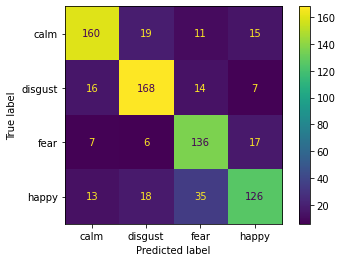

In [ ]:
y_pred = speech_model_spectrum.predict( x_test )
y_pred = np.array( [ np.argmax( pred ) for pred in y_pred ] ) 

print('Accuracy of speech model classifier on training set: {:.2f}'
     .format(accuracy_train))
print('Accuracy of speech model classifier on test set: {:.2f}'
     .format(accuracy_test))
print("----------------------------------")
print(classification_report(y_test, y_pred, target_names=['calm', 'disgust', 'fear', 'happy']))
print("----------------------------------")
cm   = confusion_matrix(y_test, y_pred, labels= [0, 1, 2, 3] )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['calm', 'disgust', 'fear', 'happy'])
disp.plot()

In [ ]:
# prepare models
models = []
models.append(('CNN2', KerasClassifier(build_fn=speech_classifier_model_3, epochs=20, batch_size=64)))

# evaluate each model in turnspeech_classifier_model_3
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, shuffle=True)
	cv_results = model_selection.cross_val_score(model, normalize_spectrum_data, encoded_emotions, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

Epoch 1/20
44/44 [==============================] - 15s 79ms/step - loss: 1.3986 - accuracy: 0.3057
Epoch 2/20
44/44 [==============================] - 3s 76ms/step - loss: 1.2381 - accuracy: 0.4501
Epoch 3/20
44/44 [==============================] - 3s 76ms/step - loss: 1.0754 - accuracy: 0.5438
Epoch 4/20
44/44 [==============================] - 3s 77ms/step - loss: 0.9350 - accuracy: 0.6241
Epoch 5/20
44/44 [==============================] - 3s 77ms/step - loss: 0.7722 - accuracy: 0.7012
Epoch 6/20
44/44 [==============================] - 3s 77ms/step - loss: 0.6955 - accuracy: 0.7341
Epoch 7/20
44/44 [==============================] - 3s 78ms/step - loss: 0.5952 - accuracy: 0.7851
Epoch 8/20
44/44 [==============================] - 3s 78ms/step - loss: 0.5039 - accuracy: 0.8216
Epoch 9/20
44/44 [==============================] - 4s 80ms/step - loss: 0.4413 - accuracy: 0.8506
Epoch 10/20
44/44 [==============================] - 4s 82ms/step - loss: 0.3784 - accuracy: 0.8828
Epoch 11

## Performance comparison

In [ ]:
from sklearn import model_selection
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
y_le = LabelEncoder()

Y_encoded      = y_le.fit_transform(Y)

[2 2 2 ... 1 1 1]


In [ ]:
# prepare models
models = []
models.append(('MLP', mlp_model))
models.append(('CNN', KerasClassifier(build_fn=speech_model_build, epochs=50, batch_size=64)))
#models.append(('CNN2', KerasClassifier(build_fn=, epochs=50, batch_size=64)))
models.append(('SVM', modelsvc))
# evaluate each model in turnspeech_classifier_model_3
#results = []
#names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y_encoded, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

MLP: 0.902321 (0.021130)
Epoch 1/50
33/33 [==============================] - 4s 27ms/step - loss: 1.5433 - accuracy: 0.2576
Epoch 2/50
33/33 [==============================] - 0s 13ms/step - loss: 1.4122 - accuracy: 0.3237
Epoch 3/50
33/33 [==============================] - 0s 13ms/step - loss: 1.3645 - accuracy: 0.3666
Epoch 4/50
33/33 [==============================] - 0s 13ms/step - loss: 1.3047 - accuracy: 0.3825
Epoch 5/50
33/33 [==============================] - 0s 13ms/step - loss: 1.2581 - accuracy: 0.4221
Epoch 6/50
33/33 [==============================] - 0s 13ms/step - loss: 1.2416 - accuracy: 0.4182
Epoch 7/50
33/33 [==============================] - 0s 13ms/step - loss: 1.2065 - accuracy: 0.4481
Epoch 8/50
33/33 [==============================] - 0s 13ms/step - loss: 1.1842 - accuracy: 0.4631
Epoch 9/50
33/33 [==============================] - 0s 13ms/step - loss: 1.1671 - accuracy: 0.4761
Epoch 10/50
33/33 [==============================] - 0s 14ms/step - loss: 1.1470 - a

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Accuracy comparison for a 10-fold cross validation')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()